In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr

import hugegp as hug

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

key = jr.key(321)

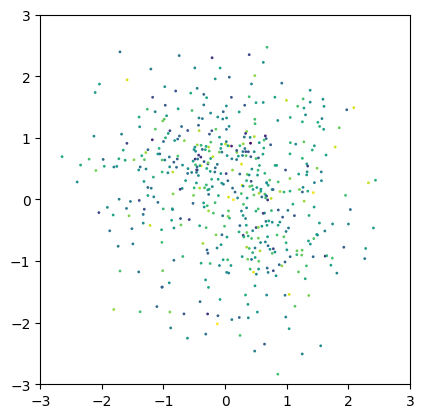

In [2]:
import jax
import jax.numpy as jnp
import jax.random as jr
import hugegp as hg
import matplotlib.pyplot as plt

key = jr.key(321)
key, k1, k2 = jr.split(key, 3)
points = jr.normal(k1, (10_000, 2))
xi = jr.normal(k2, (10_000,))
covariance = hg.matern_cov_discretized(1e-3, 10, 100)
graph = hg.build_lazy_graph(points, n_initial=100, k=8)
values = hg.generate(graph, covariance, xi, cuda=True)

plt.scatter(*points.T, c=values, s=1, cmap='viridis')
plt.gca().set(aspect='equal', xlim=(-3, 3), ylim=(-3, 3))
plt.show()

In [3]:
def log_spiral_points(noise, a=1, k=0.2, width=0.5, theta_max=16 * jnp.pi):
    theta = jnp.linspace(0, theta_max, len(noise))
    noise_theta = theta + width * noise
    r = a * jnp.exp(k * theta) / jnp.exp(k * theta_max)
    points = r * jnp.stack([jnp.cos(noise_theta), jnp.sin(noise_theta)])
    return points.T

In [4]:
n_points = 100_000
key, k1 = jax.random.split(key)
noise = jax.random.normal(k1, (n_points,))
points = log_spiral_points(noise)
covariance = hug.matern_cov_discretized(1e-9, 10.0, 1000, cutoff=0.05, eps=1e-5)
# graph = hug.build_lazy_graph(points, n_initial=100, k=8, factor=1.1)
graph = hug.build_strict_graph(points, n_initial=100, k=8)

In [ ]:
key, k1 = jr.split(key)
xi = jr.normal(k1, shape=(n_points,))
values = hug.generate(graph, covariance, xi, cuda=True)
values = values - values[0]

sz = 1e-3
crange = 1.1 * jnp.max(jnp.abs(values[jnp.linalg.norm(points, axis=1) < sz]))
plt.scatter(*points.T, c=values, s=1, cmap='inferno', vmin=-crange, vmax=crange)
plt.gca().set(aspect='equal', xlim=(-sz, sz), ylim=(-sz, sz))
plt.show()

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(*points.T, c=values, s=2, cmap='magma', vmin=-3, vmax=3)
ax.set(aspect='equal', xlim=(-1, 1), ylim=(-1, 1), xticks=[], yticks=[])
cbar = plt.colorbar(sc, ax=ax)

def update(sz):
    crange = jnp.max(jnp.abs(values[jnp.linalg.norm(points, axis=1) < sz]))
    sc.set_clim(-crange, crange)
    ax.set(xlim=(-sz, sz), ylim=(-sz, sz))
    return sc,

frame_sz = jnp.logspace(0, -3, 500)
frame_sz = jnp.concatenate([frame_sz, frame_sz[::-1]])
ani = FuncAnimation(fig, update, frames=frame_sz, blit=True, interval=1000/30)
plt.close()
HTML(ani.to_html5_video())

E0714 07:08:46.511928   11065 hlo_lexer.cc:443] Failed to parse int literal: 132889579215771513482
E0714 07:08:46.512068   11065 hlo_lexer.cc:443] Failed to parse int literal: 132889579215771513482


In [ ]:

sz = 1
crange = jnp.max(jnp.abs(values[jnp.linalg.norm(points, axis=1) < sz]))
plt.scatter(*points.T, c=values, s=2, cmap='magma', vmin=-crange, vmax=crange)
plt.gca().set(aspect='equal', xlim=(-sz, sz), ylim=(-sz, sz))
plt.colorbar()
plt.show()